<a href="https://colab.research.google.com/github/seidikun/nivelamento-icm/blob/main/Aula_2_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 2: O Sinal de Eletroencefalografia (EEG)

## Materiais

Antes de iniciar esta aula, recomendamos a leitura dos materiais listados abaixo. Eles vão dar suporte para nossa discussão.


*   Mike X Cohen - 2017 - Where Does EEG Come From and What Does it Mean? [1]
*   Brain Signals: EEG & MEG [2]

[1] https://www.cell.com/trends/neurosciences/fulltext/S0166-2236(17)30024-3?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0166223617300243%3Fshowall%3Dtrue

[2] https://www.youtube.com/watch?v=W-Zk6hrjj44 (assista esse vídeo até os ~8 minutos, vai ajudar muito a entender o sinal EEG)





## Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pasta_dados = '/content/drive/Shareddrives/Grupo Ada/🧠 PROJETOS/🦾🧠 ICM com treino zero/Nivelamento ICM/'

## O que é o EEG?


**[Exercício] Qual a origem fisiológica do sinal EEG?**


**[Exercício] Explique e discuta: como o sinal EEG é registrado e como ele se torna um dado no colab?**


In [ ]:
# @title Clique duas vezes para saber a resposta

'''Existem muitas origens possíveis do sinal EEG, mas acredita-se que a principal seja a soma de potenciais pós-sinápticos
excitatórios em neurônios piramidais do córtex. Esses neurônios estão orientados radialmente em relação ao nosso crânio,
e, quando sincronizados, seu potencial se soma ao ponto de o campo elétrico ser registrado no escalpo. Se quiser, assista
o vídeo referenciado no início deste colab.

Como esse sinal se torna um dado? Primeiro, eletrodos são posicionados na cabeça de uma pessoa, esses eletrodos registram
a diferença de potencial elétrico entre dois pontos da cabeça (eletrodo em relação a uma referência) e amplifica esse sinal
em milhares de vezes. Esse sinal é amostrado em uma determinada frequência de aquisição e então quantizado, um processo
transforma o valor lido em bits (0s e 1s do computador)'''


Vamos abrir e explorar um dado EEG já registrado e salvo:

**[Exercício] Carregue o dado motor_mi_eeg.csv da pasta_dados usando a biblioteca pandas.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
arquivo = pasta_dados + 'motor_mi_eeg.csv'

df_eeg = pd.read_csv(arquivo) # Abrindo o arquivo csv no pandas
df_eeg.head()

,Time:512Hz,Epoch,Channel 1,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 7,Channel 8,...,Channel 12,Channel 13,Channel 14,Channel 15,Channel 16,Aux 1,Aux 2,Event Id,Event Date,Event Duration
0,0.000000,0,2950.635010,-7442.627441,13124.219727,24706.789062,4571.533691,6340.967285,-2512.988525,11903.125977,...,2408.789307,3982.031494,-14081.934570,4350.342285,1226.171997,-420.947296,5704.053223,32769,0.0000000000,0.0000000000
1,0.001953,0,2954.199463,-7434.668457,13131.348633,24712.550781,4579.443848,6347.754395,-2504.590088,11907.569336,...,2413.037354,3991.357666,-14072.022461,4352.637207,1227.490356,-422.021515,5669.385254,NaN,NaN,NaN
2,0.003906,0,2952.978760,-7445.508301,13125.538086,24712.843750,4574.951660,6346.436035,-2508.545166,11905.469727,...,2410.302979,3993.213135,-14075.440430,4355.713379,1226.709106,-417.822296,5664.502441,NaN,NaN,NaN
3,0.005859,0,2960.791260,-7449.561035,13123.975586,24708.302734,4570.996582,6343.213379,-2504.931885,11906.153320,...,2414.941650,3994.433838,-14073.633789,4357.666504,1232.080200,-421.435577,5676.562988,NaN,NaN,NaN
4,0.007812,0,2972.461182,-7440.234863,13128.418945,24714.650391,4577.441895,6347.168457,-2501.416260,11908.936523,...,2417.578369,3996.191650,-14071.338867,4357.520020,1232.373169,-417.968781,5694.189941,NaN,NaN,NaN


O arquivo acima foi salvo em formato .csv pelo software OpenVibe. Você conhece esse formato de arquivo?
No arquivo csv, o dado é descrito em valores separados por vírgula. Abaixo, reproduzimos uma parte do dado aberto no pandas:



```
Time:512Hz,Epoch,Channel 1,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 7,Channel 8,Channel 9,Channel 10,Channel 11,Channel 12,Channel 13,Channel 14,Channel 15,Channel 16,Aux 1,Aux 2,Event Id,Event Date,Event Duration
0.0000000000,0,2950.6350097656,-7442.6274414063,13124.2197265625,24706.7890625000,4571.5336914063,6340.9672851563,-2512.9885253906,11903.1259765625,-956.5918579102,3984.7170410156,17312.6484375000,2408.7893066406,3982.0314941406,-14081.9345703125,4350.3422851563,1226.1719970703,-420.9472961426,5704.0532226563,32769,0.0000000000,0.0000000000
0.0019531250,0,2954.1994628906,-7434.6684570313,13131.3486328125,24712.5507812500,4579.4438476563,6347.7543945313,-2504.5900878906,11907.5693359375,-955.9570922852,3988.2814941406,17321.6328125000,2413.0373535156,3991.3576660156,-14072.0224609375,4352.6372070313,1227.4903564453,-422.0215148926,5669.3852539063,,,
0.0039062500,0,2952.9787597656,-7445.5083007813,13125.5380859375,24712.8437500000,4574.9516601563,6346.4360351563,-2508.5451660156,11905.4697265625,-956.2988891602,3991.4553222656,17324.2695312500,2410.3029785156,3993.2131347656,-14075.4404296875,4355.7133789063,1226.7091064453,-417.8222961426,5664.5024414063,,,
0.0058593750,0,2960.7912597656,-7449.5610351563,13123.9755859375,24708.3027343750,4570.9965820313,6343.2133789063,-2504.9318847656,11906.1533203125,-960.0586547852,3992.5295410156,17324.8554687500,2414.9416503906,3994.4338378906,-14073.6337890625,4357.6665039063,1232.0802001953,-421.4355773926,5676.5629882813,,,
0.0078125000,0,2972.4611816406,-7440.2348632813,13128.4189453125,24714.6503906250,4577.4418945313,6347.1684570313,-2501.4162597656,11908.9365234375,-954.2969360352,4002.4904785156,17331.3007812500,2417.5783691406,3996.1916503906,-14071.3388671875,4357.5200195313,1232.3731689453,-417.9687805176,5694.1899414063,,,
0.0097656250,0,2969.4826660156,-7445.2153320313,13125.6845703125,24707.9609375000,4571.0454101563,6340.6743164063,-2505.2736816406,11904.6396484375,-961.7188110352,3995.6545410156,17322.6582031250,2408.4475097656,3992.0900878906,-14079.7373046875,4351.3188476563,1225.0001220703,-409.2773742676,5767.2368164063,,,
```



Você consegue ver como o dado em formato .csv descreve uma tabela? Vamos agora olhar para o dado em si

**[Exercício] Descreva o sinal carregado: Qual a taxa de aquisição? Qual o tamanho do dado? E o que significa cada coluna do DataFrame?**



In [ ]:
(df_eeg['Time:512Hz'].iloc[-1] - df_eeg['Time:512Hz'].iloc[-0])/60

4.247884114583333

In [ ]:
df_eeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130496 entries, 0 to 130495
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Time:512Hz      130496 non-null  float64
 1   Epoch           130496 non-null  int64  
 2   Channel 1       130496 non-null  float64
 3   Channel 2       130496 non-null  float64
 4   Channel 3       130496 non-null  float64
 5   Channel 4       130496 non-null  float64
 6   Channel 5       130496 non-null  float64
 7   Channel 6       130496 non-null  float64
 8   Channel 7       130496 non-null  float64
 9   Channel 8       130496 non-null  float64
 10  Channel 9       130496 non-null  float64
 11  Channel 10      130496 non-null  float64
 12  Channel 11      130496 non-null  float64
 13  Channel 12      130496 non-null  float64
 14  Channel 13      130496 non-null  float64
 15  Channel 14      130496 non-null  float64
 16  Channel 15      130496 non-null  float64
 17  Channel 16

In [ ]:
# @title Clique duas vezes para saber a resposta

'''A frequência do sinal é 512Hz, como pode ser visto na primeira coluna. Essa é uma informação que, em geral, é informada
junto com o dado ou você sabe por conhecer o sistema de aquisição.

O dado tem 22.9Mb de tamanho, com duração de aproximadamente 4 minutos e meio.

As colunas com nome 'Channel n' são os eletrodos de registro do EEG e as colunas com nome 'Aux n' são eletrodos auxiliares,
em geral EMG, o sinal muscular. Demais colunas são marcações realizadas durante o experimento de coleta deste sinal, mas
não vamos olhar elas neste colab '''


Podemos dizer que o dado EEG é composto por 4 dimensões independentes: espaço, tempo, energia e frequência.

As dimensões são características que compõem o sinal EEG, gerando informação do sinal. Abaixo, exploramos cada uma dessas características.

## Espaço

O EEG é registrado por meio de eletrodos. Os eletrodos são os transdutores da atividade encefálica em sinal elétrico no sistema de aquisição.

Cada eletrodo possui uma localização específica no momento do registro, isso porque é esperado que cada região do escalpo gere registro da atividade encefálica logo abaixo de si. Por exemplo: um eletrodo posicioado em C3, na convenção internacional 10-20 (linha central do córtex somatossensorial/motor, medio-lateral esquerda) registre o sinal correlacionado ao movimento da mão direita.


**[Exercício] O que é o sistema internacional 10-20? Se não souber, pesquise**

In [ ]:
# @title Clique duas vezes para saber a resposta

'''O sistema 10-20 é uma referência de posicionamento dos eletrodos de EEG, que realiza espaçamentos de acordo com 10% e
20% de divisões de duas medidas conhecidas: entre o ínion e o nasion (frente-trás da cabeça) e os dois mastóides (laterais)

Veja uma imagem explicativa no link: https://images.squarespace-cdn.com/content/v1/54ddd9b0e4b0e11f3685f546/1ae788ad-09f6-4625-b885-2bf57e9253c1/figure+1.png'''

Vamos abrir o template da touca utilizada para registrar o nosso dado

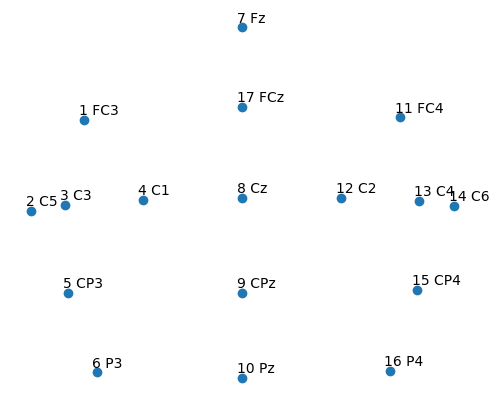

In [ ]:
#@title  Rode esta célula para ver o template da touca

df_ch = pd.read_csv(pasta_dados + 'motor_16ch.csv', delimiter = ';')
plt.figure(figsize = (6, 5))
plt.scatter(df_ch['x'], df_ch['y'])
for i in range(len(df_ch)):
  plt.text(df_ch.iloc[i]['x']-2, df_ch.iloc[i]['y']+2, str(i+1)+' '+df_ch.iloc[i]['channel_label'])
plt.axis('off')
plt.show()

## Tempo

O que é o tempo? De onde vem o tempo registrado no sinal EEG?

**[Exercício] Discuta: o que é o vetor tempo no nosso sinal e como ele foi registrado?**

In [ ]:
# @title Clique duas vezes para saber a resposta

'''Um contador no software de aquisição gerou uma contagem de tempo de acordo com cada momento de aquisição.
O tempo é registrado começando de 0 e contando de T em T, onde T é o tempo entre duas amostras'''

<Axes: >

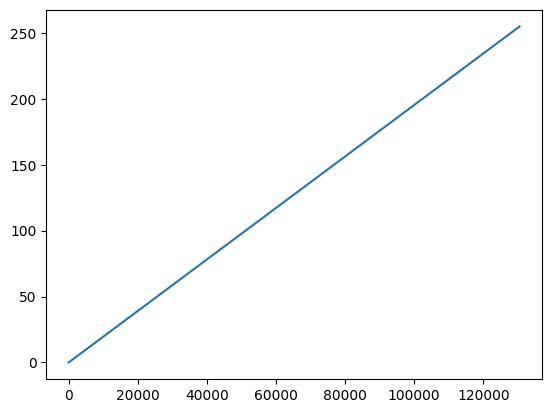

In [ ]:
df_eeg['Time:512Hz'].plot()

## Energia

Cada canal do EEG registra flutuações de voltagem ao longo do tempo. Esses valores são salvos junto com a contagem de tempo atual e são a medida instantânea da diferença de potencial elétrico entre um eletrodo de referência e o eletrodo em questão.

**[Exercício] Explique o que é a diferença de potencial elétrico (tensão/voltagem) e o seu entendimento do sinal registrado em um determinado canal de EEG**

**[Exercício] Encontre no DataFrame os canais de registro do EEG e plote alguns deles**

<Axes: >

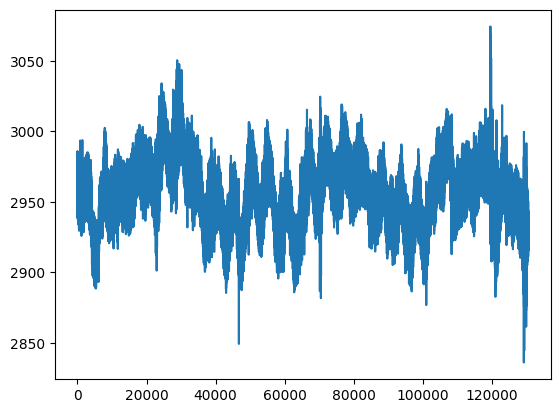

In [ ]:
df_eeg['Channel 1'].plot()

<Axes: >

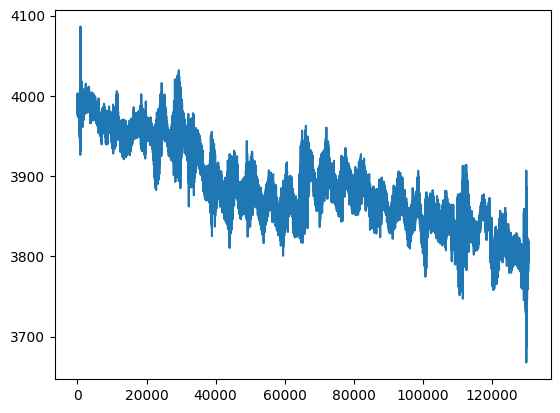

In [ ]:
df_eeg['Channel 13'].plot()

Não precisamos interpretar o sinal, mas explore bem o dado e veja se faz sentido pra você. Os canais 'Channel n' estão posicionados de acordo com o sistema 10-20 citado mais acima e, mais especificamente, de acordo com a imagem da Seção [Espaço](https://colab.research.google.com/drive/1LCN0dmXlCNfkDxAI2DKp09efott42hnB#scrollTo=IhPRU32e9X0n)

## Frequência


**[Exercício] O que é a frequência?**

Se você leu o artigo [Mike X Cohen, 2017] ou outras referências sobre EEG, provavalmente vai saber que as principais características desse sinal são as oscilações.

Diversas características fisiológicas (e.g. movimento, percepção, atenção, etc) possuem uma correspondência com oscilações no sinal EEG.

Vamos pensar na lógica inversa: a partir do sinal EEG, podemos extrair as características fisiológicas correspondentes.

**[Exercício] Isso é verdade? Quais as limitações do EEG?**

In [ ]:
# @title Clique duas vezes para saber a resposta

'''O EEG é uma tecnologia de baixa resolução espacial e que capta apenas o campo elétrico de células radialmente orientadas
em relação ao crânio, ou seja, as oscilações de neurônios individuais ou poucos neurônios não são registrados pelo EEG, e
neurônios orientados de forma que o campo não alinhe com o eletrodo também não são registrados.

O que é mais importante de entender aqui: o EEG não capta todo o sinal do cérebro, mesmo sinais oscilatórios e, portanto,
alguns padrões de processamento cortical não aparecem no dado, por mais que ele seja processado'''

### Transformada de Fourier


A nossa principal ferramenta de análise das frequências (ou análise espectral) é uma transformada que gera uma representação do sinal EEG, mas em termos de sua decomposição em oscilações e quão proeminentes elas são.

A transformada de Fourier faz algo simples: correlaciona senoides em todo o espectro de frequências com o sinal, gerando um valor de correlação para cada frequência. O resultado é o espectro de potências!

Uma forma mais simples de entender: a transformada de Fourier decompõe o sinal em oscilações puras, tornando simples a visualização e características oscilatórias do sinal.

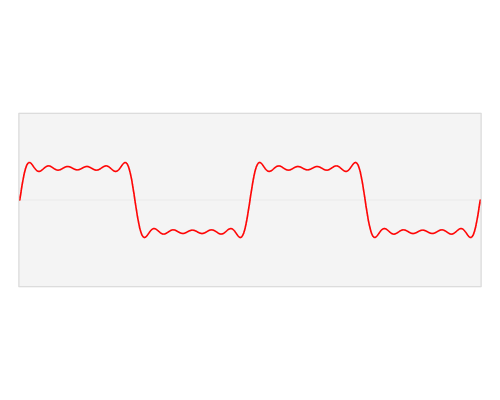

Não precisamos entender  fundo o que é a transformada de Fourier. Se você tiver dificuldade em compreender esta parte, podemos estudar juntos nos encontros do projeto de ICM.

O que é importante saber: o sinal EEG possui características oscilatórias e é possível observar elas usando a transformada de Fourier.

**[Exercício] Aplique a transformada de Fourier no sinal EEG. O código inicial está abaixo, utilize o exemplo em https://docs.scipy.org/doc/scipy/tutorial/fft.html para completar o exercício.**

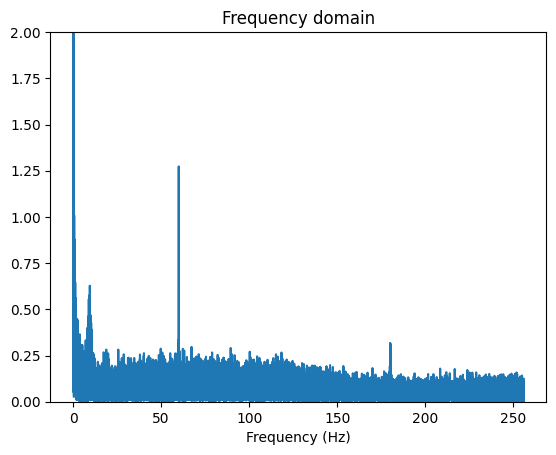

In [ ]:
from scipy.fft import fft, fftfreq

signal = np.array(df_eeg['Channel 2'])
n = len(signal)
# compute FFTs
signalX = fft(signal)/n
hz = np.linspace(0,512/2,int(np.floor(n/2)))

plt.plot(hz,2*np.abs(signalX[0:len(hz)]))
plt.xlabel('Frequency (Hz)')
plt.title('Frequency domain')
plt.ylim(0, 2)
plt.show()